In [1]:
import pandas as pd
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt

$$ \text{Average:    } TD_{c_1 \cup c_2} = \sum_{x \ in c_1 \cup c_2}D(x,\mu_{c_1 \cup c_2})^2$$

$$ \text{Ward's Method:    } D(c_1,c_2) = \frac{1}{|c_1|}\frac{1}{|c_2|}\sum_{x_1 \in c_1}\sum_{x_2 \in c_2} D(x_1,x_2)$$

Stock data for PG:
                open      high       low     close  adjclose   volume ticker
1970-03-25  1.675781  1.761719  1.675781  1.703125  0.378553  1760000     PG
1970-03-26  1.703125  1.714844  1.695313  1.703125  0.378553   422400     PG
1970-03-30  1.687500  1.687500  1.660156  1.683594  0.374212   531200     PG
1970-03-31  1.683594  1.703125  1.681641  1.703125  0.378553   243200     PG
1970-04-01  1.718750  1.734375  1.718750  1.726563  0.383762   806400     PG


Stock data for JNJ:
                open      high       low     close  adjclose   volume ticker
1970-03-25  1.062500  1.100694  1.062500  1.086806  0.337554  2275200    JNJ
1970-03-26  1.086806  1.093750  1.083333  1.086806  0.337554   936000    JNJ
1970-03-30  1.086806  1.092014  1.079861  1.081597  0.335936  1368000    JNJ
1970-03-31  1.076389  1.076389  1.065972  1.072917  0.333241   676800    JNJ
1970-04-01  1.069444  1.069444  1.062500  1.065104  0.330814   820800    JNJ


Stock data for XOM:
             

/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/609625189.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/609625189.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/609625189.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/609625189.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use ob

PG


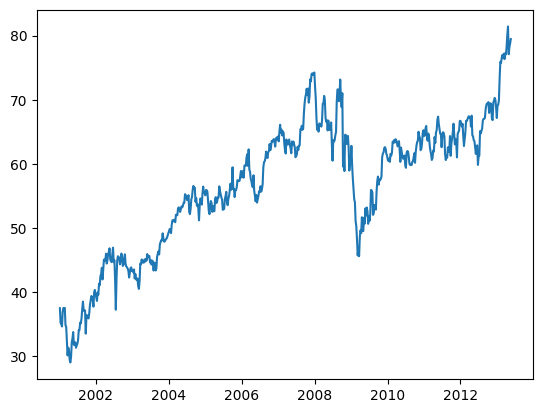

JNJ


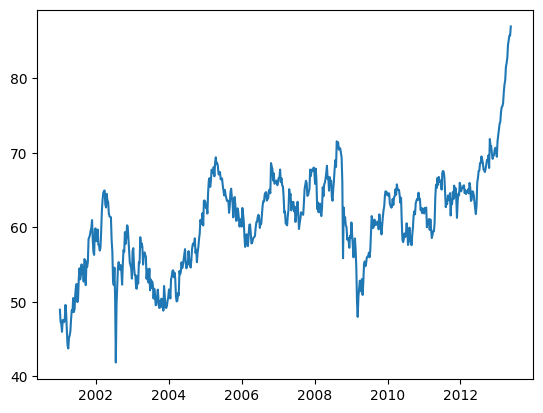

XOM


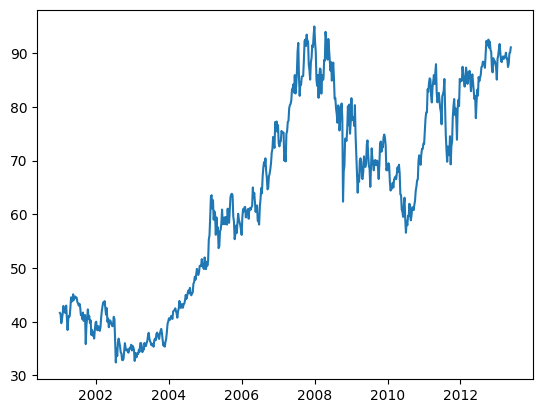

CVX


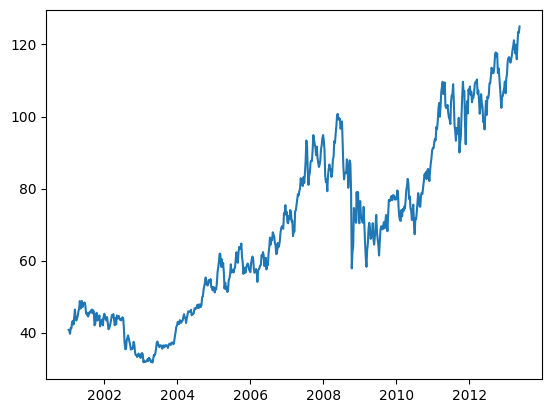

MRK


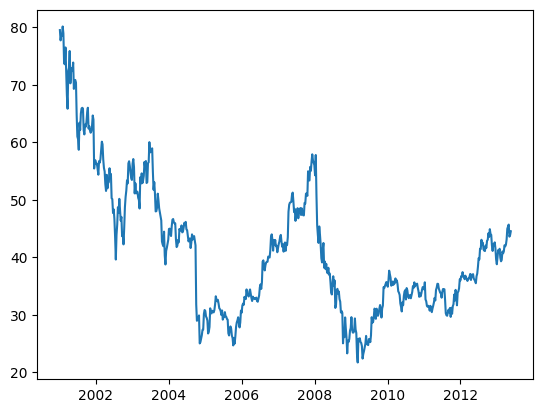

PFE


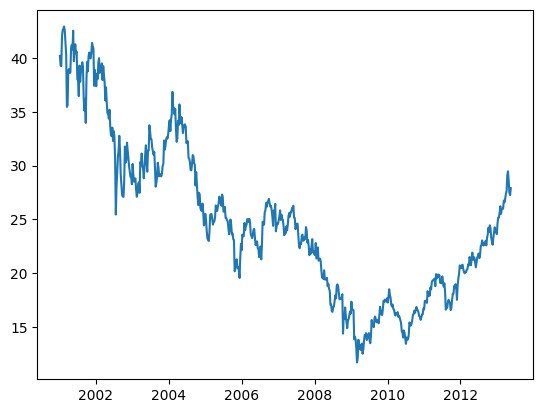

MCD


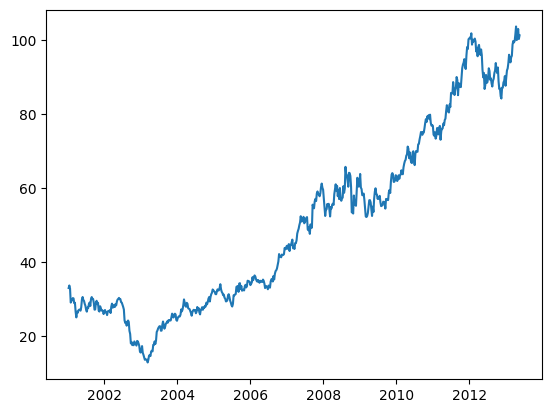

T


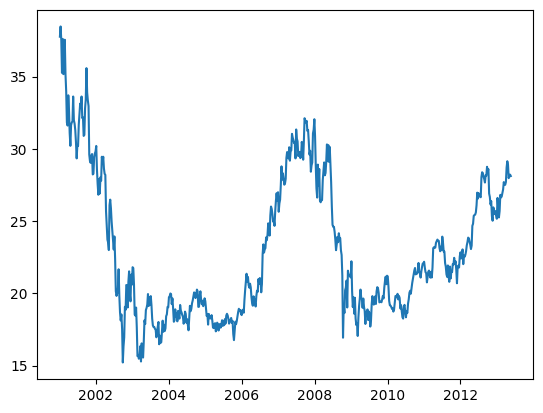

VZ


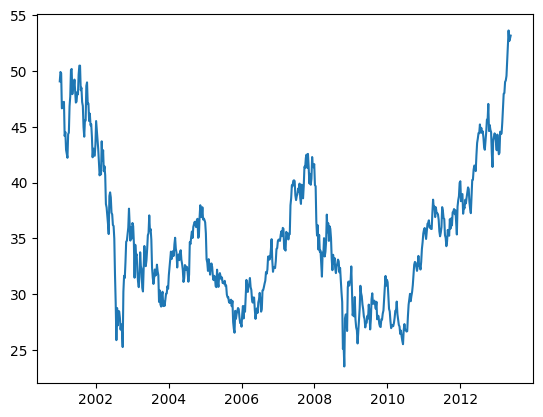

HPQ


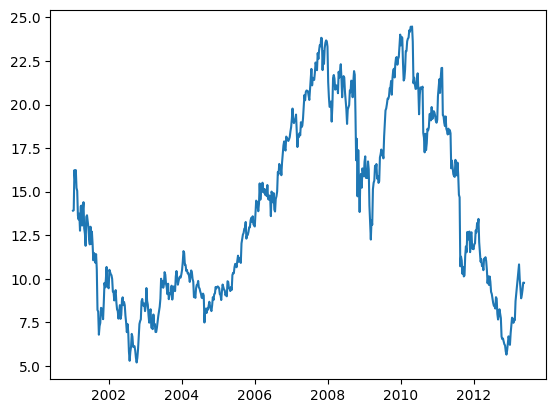

IBM


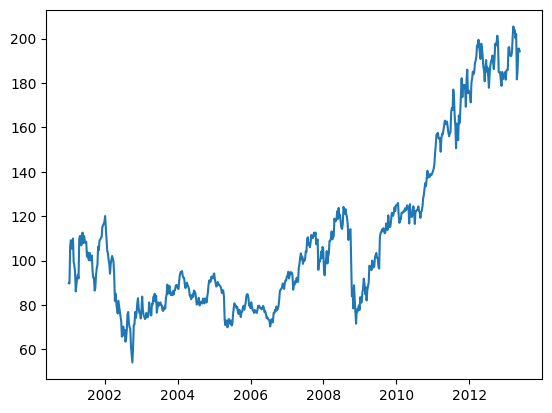

MSFT


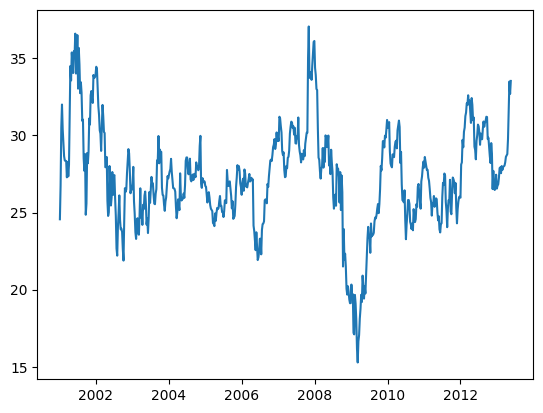

INTC


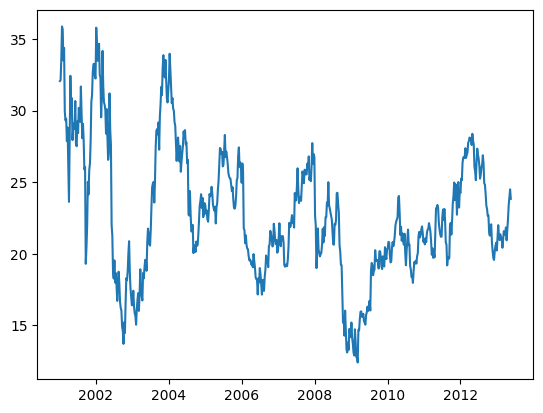

HD


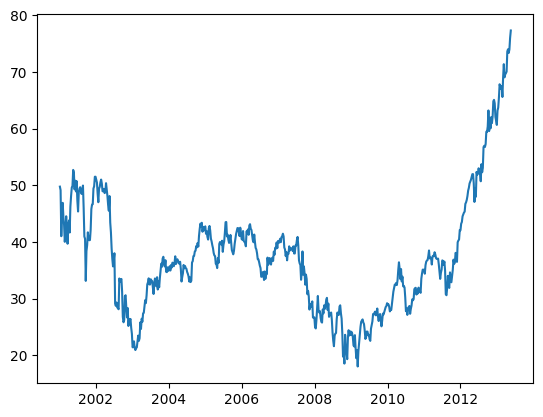

WMT


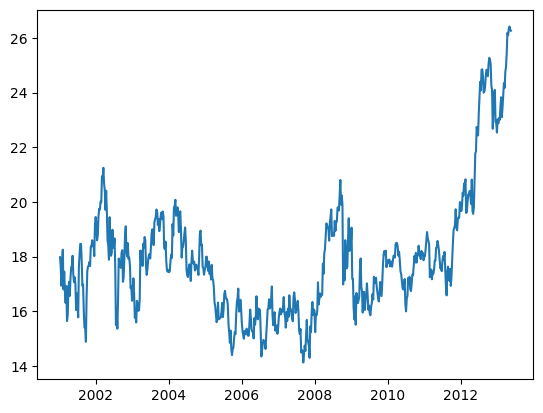

TRV


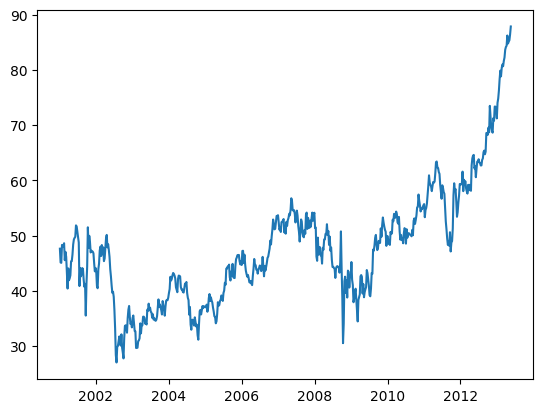

RTX


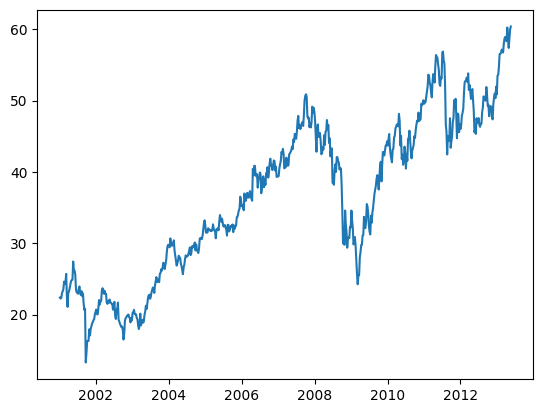

BA


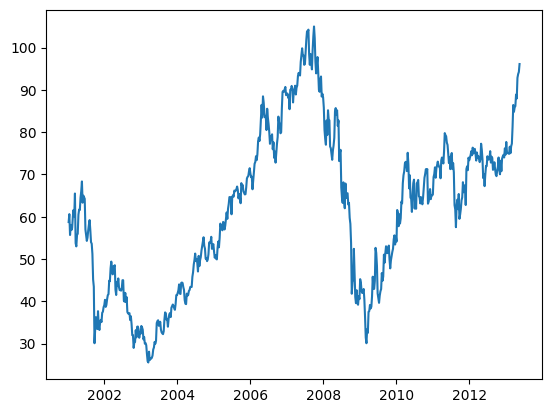

AA


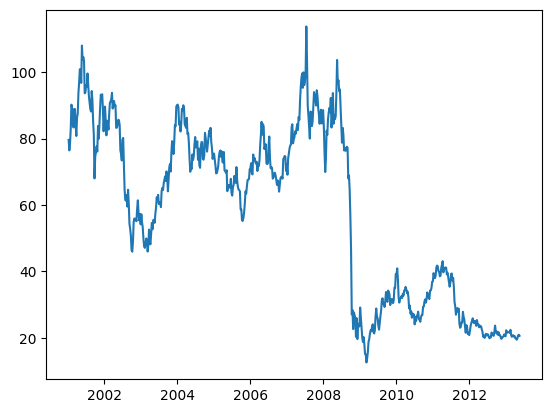

DD


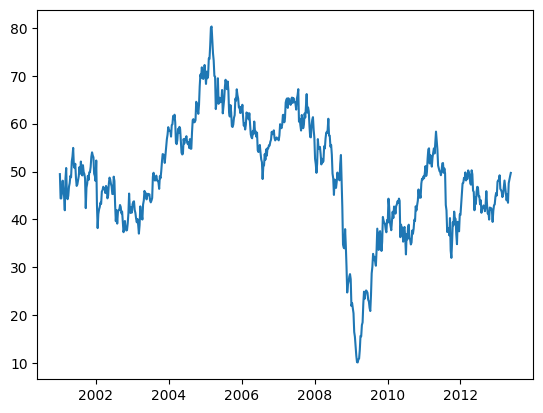

CAT


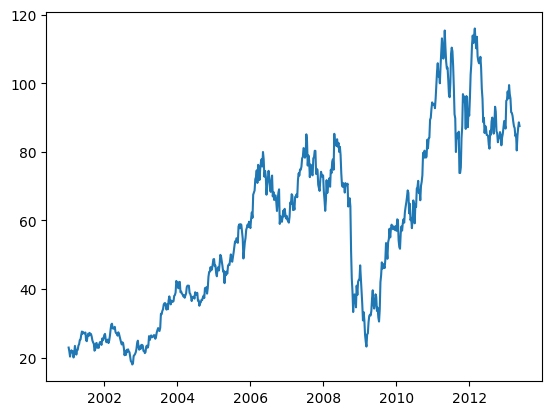

MMM


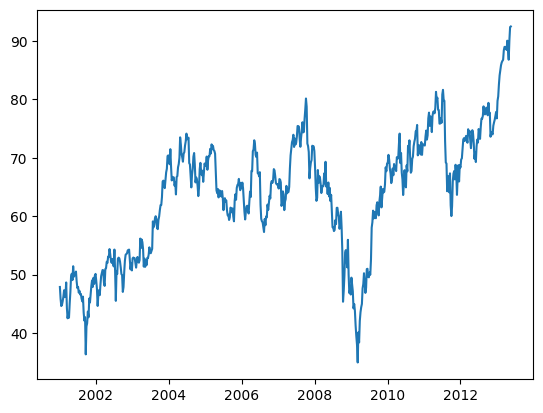

DIS


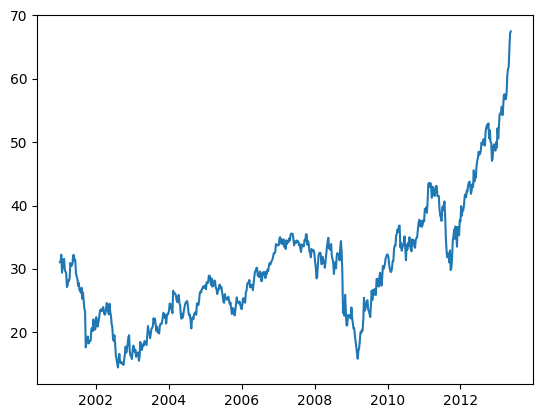

JPM


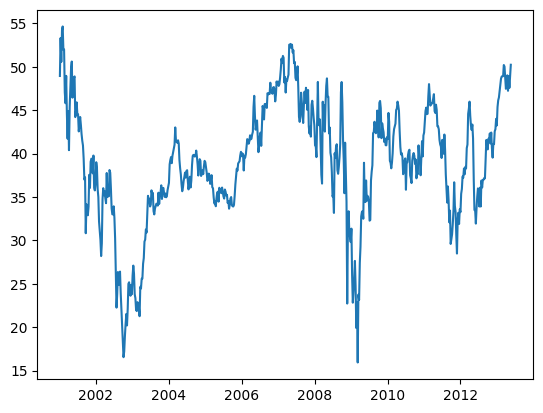

AXP


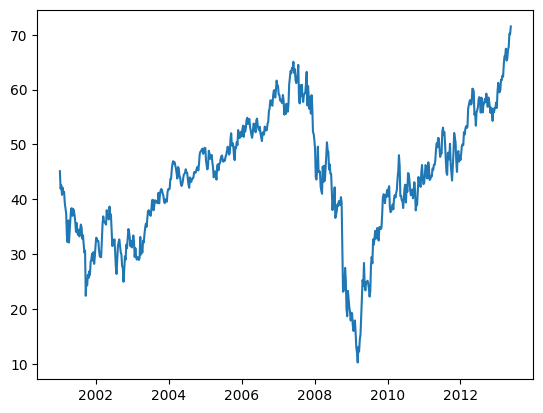

GE


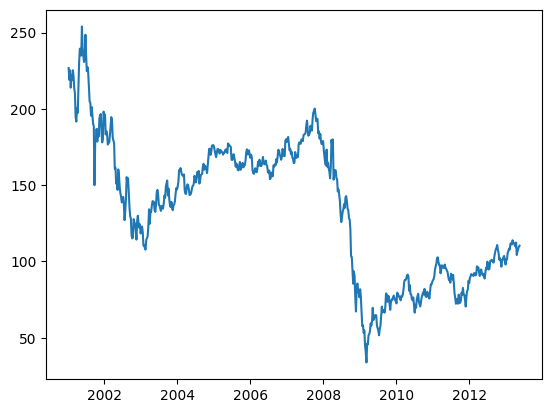

CCEP


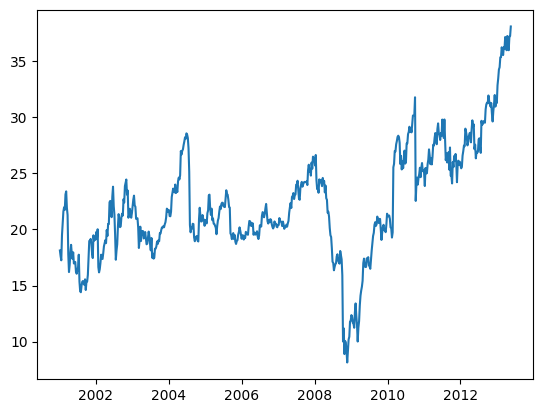

In [2]:
# List of tickers for the 30 companies
# custom_tickers = [
#     "AMZN", "AXP", "AMGN", "AAPL", "BA",
#     "CAT", "CSCO", "CVX", "GS", "HD",
#     "HON", "IBM", "INTC", "JNJ", "KO",
#     "JPM", "MCD", "MMM", "MRK", "MSFT",
#     "NKE", "PG", "TRV", "UNH", "CRM",
#     "VZ", "V", "WMT", "DIS", "DJI"
# ]

#PAST DJIA
custom_tickers = [
    "PG", "JNJ", "XOM", "CVX", "MRK", "PFE", "MCD", "T",
    "VZ", "HPQ", "IBM", "MSFT", "INTC", "HD", "WMT", "TRV",
    "RTX", "BA", "AA", "DD", "CAT", "MMM", "DIS", "JPM", "AXP", "GE",
    "CCEP"
    #"CRJ", "H", "BOA","CCEP"
]


# Fetch data for each ticker
stock_data = {}
for ticker in custom_tickers:
    try:
        data = get_data(ticker)
        stock_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")

# Print the first few rows of the data for each ticker
for ticker in custom_tickers:
    if ticker in stock_data:
        print(f"Stock data for {ticker}:")
        print(stock_data[ticker].head())
        print("\n")

def calculate_weekly_returns(df):
    weekly_df = df.resample('W').last()
    weekly_df['close'].fillna(method='ffill', inplace=True)
    weekly_df['returns'] = weekly_df['close'].pct_change().fillna(0)
    return weekly_df

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data = data.loc['2001-01-02':'2013-05-14']
    data.index = pd.to_datetime(data.index)
    weekly_returns = calculate_weekly_returns(data)
    weekly_returns_dict[ticker] = weekly_returns

for i in custom_tickers:
    print(i)
    plt.plot(weekly_returns_dict[i].index,weekly_returns_dict[i]["close"])
    plt.show()

In [26]:
study_periods = [
    ('2001-01-02', '2004-01-06'),
    ('2004-01-06', '2007-01-02'),
    ('2007-01-02', '2010-01-05'),
    ('2010-01-05', '2013-05-14')
]

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data.index = pd.to_datetime(data.index)
    
    for period_num, (start_date, end_date) in enumerate(study_periods, start=1):
        period_data = data.loc[start_date:end_date]
        period_returns = calculate_weekly_returns(period_data)
        weekly_returns_dict.setdefault(ticker, {})[f'period_{period_num}'] = period_returns

period_dfs = {}

# Iterate over the periods
for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    # Initialize an empty dictionary to store data for the current period
    period_data = {}
    
    # Iterate over each ticker's data
    for ticker, data in weekly_returns_dict.items():
        # Drop NaN values from the 'close' column for the current period
        close_prices = data[period][['returns']].dropna()
        period_data[ticker] = close_prices
    
    # Concatenate the data for all tickers into a single DataFrame for the current period
    period_df = pd.concat(period_data, axis=1)
    period_dfs[period] = period_df.dropna(axis=1)

correlation_matrices = {}

# Iterate over the periods
for period, period_df in period_dfs.items():
    # Calculate correlation matrix for the current period and store it in the dictionary
    correlation_matrices[period] = period_df.corr()


/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/609625189.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/609625189.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/609625189.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/609625189.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use ob

MultiIndex([(  'PG', 'returns'),
            ( 'JNJ', 'returns'),
            ( 'XOM', 'returns'),
            ( 'CVX', 'returns'),
            ( 'MRK', 'returns'),
            ( 'PFE', 'returns'),
            ( 'MCD', 'returns'),
            (   'T', 'returns'),
            (  'VZ', 'returns'),
            ( 'HPQ', 'returns'),
            ( 'IBM', 'returns'),
            ('MSFT', 'returns'),
            ('INTC', 'returns'),
            (  'HD', 'returns'),
            ( 'WMT', 'returns'),
            ( 'TRV', 'returns'),
            ( 'RTX', 'returns'),
            (  'BA', 'returns'),
            (  'AA', 'returns'),
            (  'DD', 'returns'),
            ( 'CAT', 'returns'),
            ( 'MMM', 'returns'),
            ( 'DIS', 'returns'),
            ( 'JPM', 'returns'),
            ( 'AXP', 'returns'),
            (  'GE', 'returns'),
            ('CCEP', 'returns')],
           )
MultiIndex([(  'PG', 'returns'),
            ( 'JNJ', 'returns'),
            ( 'XOM', 'returns

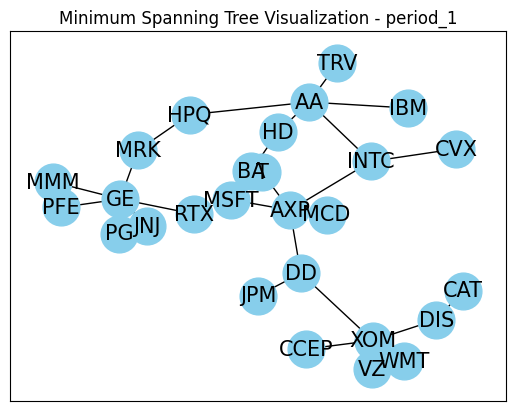

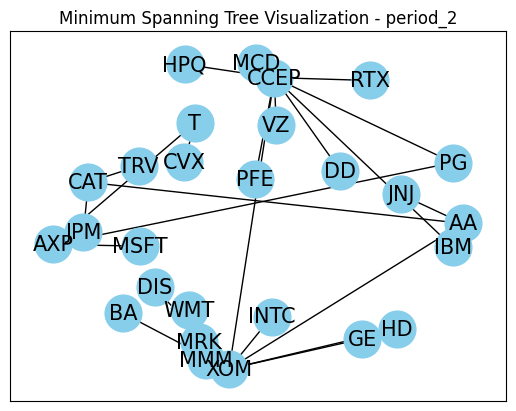

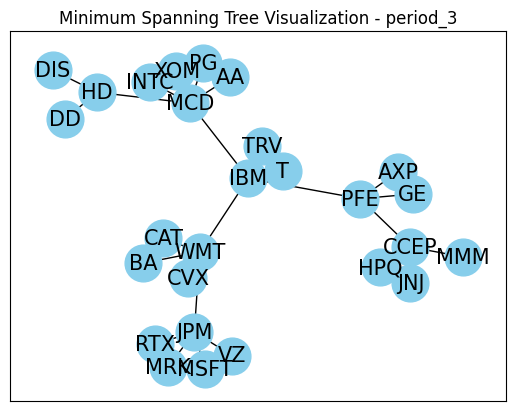

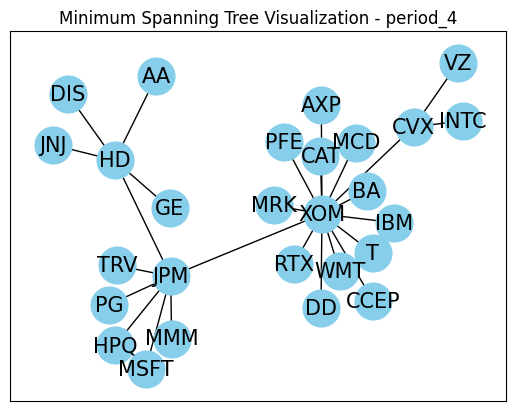

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    distance_matrix = correlation_matrices[period]
    tickers = sorted(set([index[0] for index in distance_matrix]))
    labels = {i: ticker for i, ticker in enumerate(tickers)}

    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, edge_color='k')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
    plt.title(f"Minimum Spanning Tree Visualization - {period}")
    plt.show()


/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


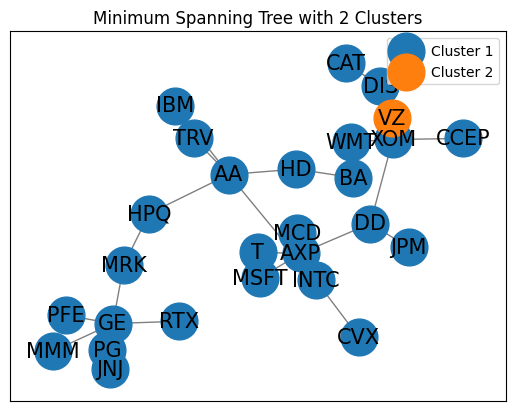

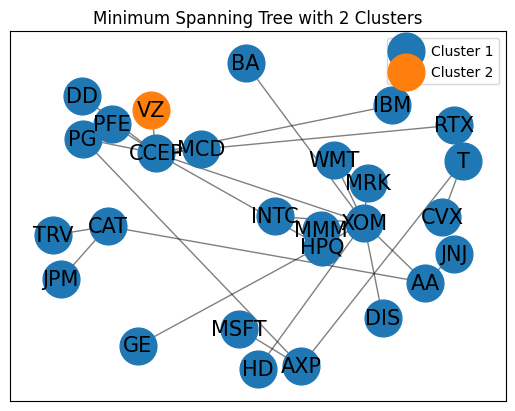

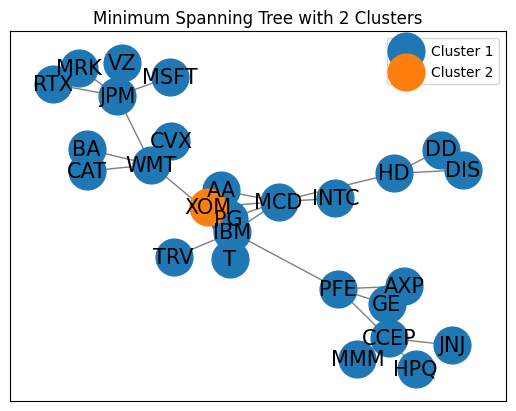

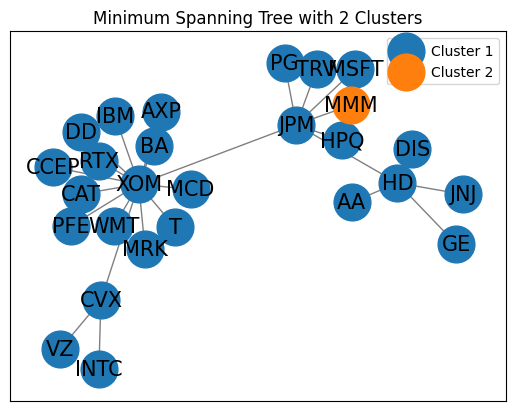

In [39]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    distance_matrix = correlation_matrices[period]
    tickers = sorted(set([index[0] for index in distance_matrix]))
    labels = {i: ticker for i, ticker in enumerate(tickers)}

    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    def form_clusters(graph, num_clusters):
        # Copy the graph to avoid modifying the original
        graph_copy = graph.copy()
        
        # Sort edges by weight in descending order
        sorted_edges = sorted(graph_copy.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
        
        # Remove edges to form clusters
        for i in range(num_clusters - 1):
            edge_to_remove = sorted_edges[i]
            graph_copy.remove_edge(edge_to_remove[0], edge_to_remove[1])
        
        # Get connected components as clusters
        clusters = list(nx.connected_components(graph_copy))
        return clusters

    # Form clusters
    num_clusters = 2  # Desired number of clusters
    clusters = form_clusters(G.copy(), num_clusters)

    # Plot the graph with clusters colored
    pos = nx.spring_layout(G)
    for i, cluster in enumerate(clusters):
        nx.draw_networkx_nodes(G, pos, nodelist=cluster, node_color=plt.cm.tab10(i), node_size=700, label=f'Cluster {i+1}')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
    plt.title(f"Minimum Spanning Tree with {num_clusters} Clusters")
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


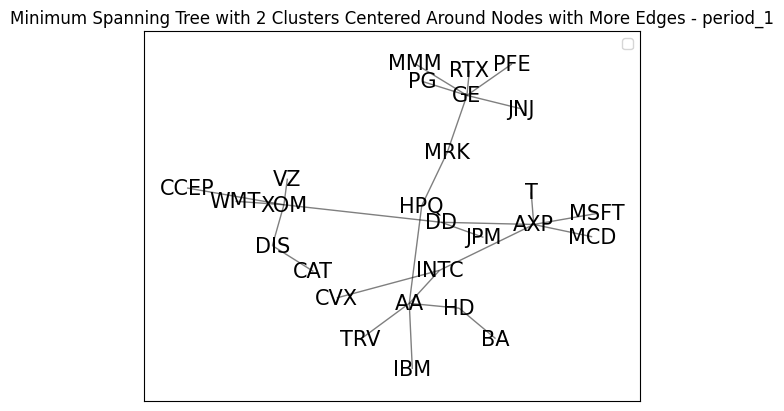

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


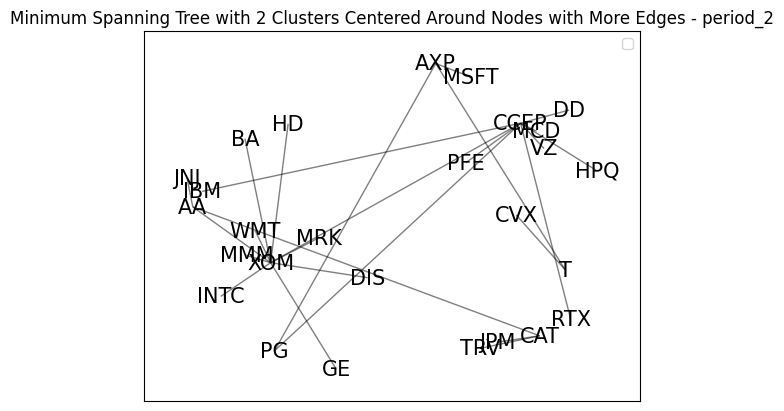

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


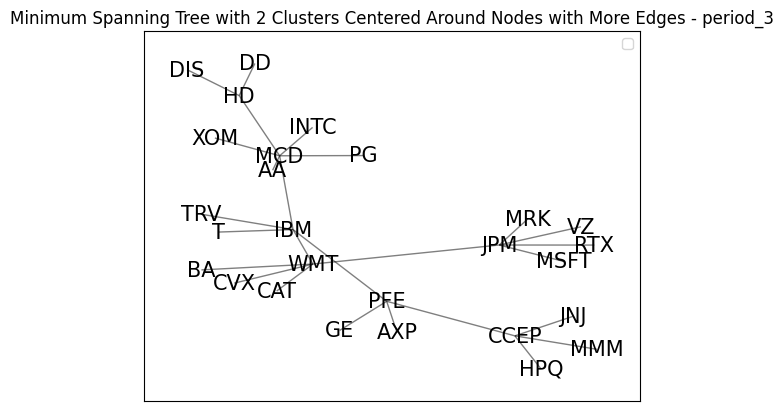

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


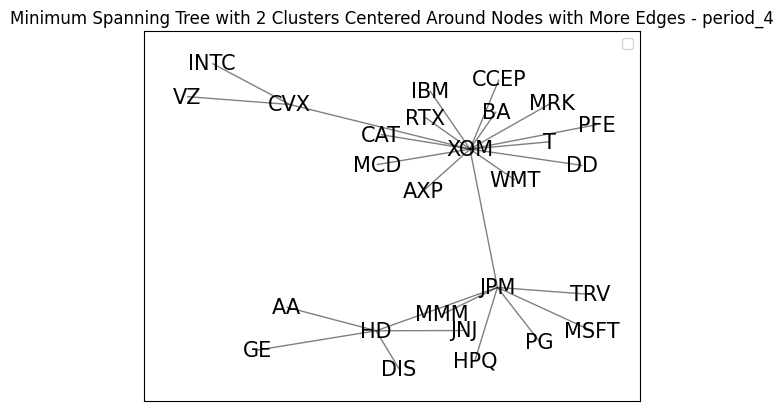

In [40]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    distance_matrix = correlation_matrices[period]
    tickers = sorted(set([index[0] for index in distance_matrix]))
    labels = {i: ticker for i, ticker in enumerate(tickers)}

    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    def form_clusters(graph, num_clusters):
        # Copy the graph to avoid modifying the original
        graph_copy = graph.copy()

        # Find the nodes with the highest degree
        central_nodes = sorted(graph_copy.degree, key=lambda x: x[1], reverse=True)[:num_clusters]

        # Remove edges to form clusters around central nodes
        for central_node in central_nodes:
            for node in list(graph_copy.nodes):
                if node != central_node[0] and node in graph_copy:
                    graph_copy.remove_node(node)

        # Get connected components as clusters
        clusters = list(nx.connected_components(graph_copy))
        return clusters

    # Form clusters
    num_clusters = 2  # Desired number of clusters
    clusters = form_clusters(G.copy(), num_clusters)

    # Plot the graph with clusters colored
    pos = nx.spring_layout(G)
    for i, cluster in enumerate(clusters):
        nx.draw_networkx_nodes(G, pos, nodelist=cluster, node_color=plt.cm.tab10(i), node_size=700, label=f'Cluster {i+1}')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
    plt.title(f"Minimum Spanning Tree with {num_clusters} Clusters Centered Around Nodes with More Edges - {period}")
    plt.legend()
    plt.show()


/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


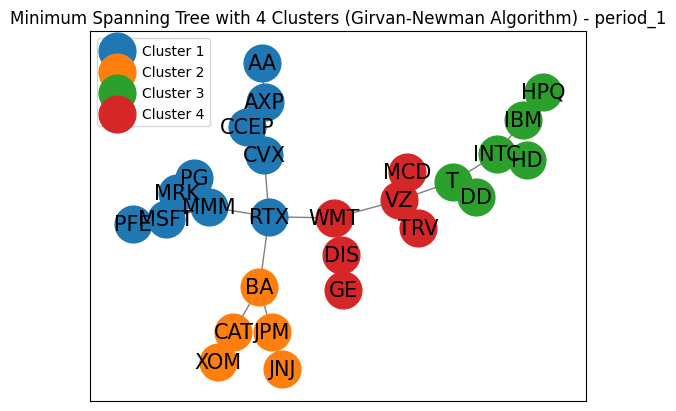

Metrics for period_1:
Cluster 1: Average Return = 0.0014, Standard Deviation = 0.0282, Sharpe Ratio = 0.0497
Cluster 2: Average Return = 0.0011, Standard Deviation = 0.0324, Sharpe Ratio = 0.0345
Cluster 3: Average Return = 0.0005, Standard Deviation = 0.0376, Sharpe Ratio = 0.0129
Cluster 4: Average Return = -0.0007, Standard Deviation = 0.0301, Sharpe Ratio = -0.0221
Evaluating Portfolios for period_1 in period_2:
Overall Portfolio Metrics: Average Return = 0.0017, Standard Deviation = 0.0183, Sharpe Ratio = 0.0951


/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


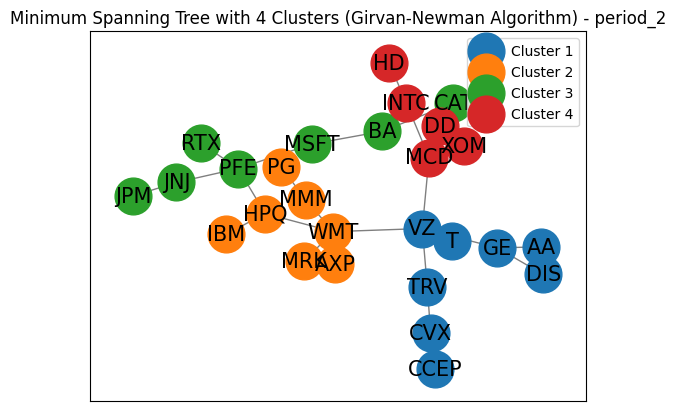

Metrics for period_2:
Cluster 1: Average Return = 0.0015, Standard Deviation = 0.0156, Sharpe Ratio = 0.0989
Cluster 2: Average Return = 0.0013, Standard Deviation = 0.0144, Sharpe Ratio = 0.0878
Cluster 3: Average Return = 0.0019, Standard Deviation = 0.0169, Sharpe Ratio = 0.1132
Cluster 4: Average Return = 0.0014, Standard Deviation = 0.0193, Sharpe Ratio = 0.0748
Evaluating Portfolios for period_2 in period_3:
Overall Portfolio Metrics: Average Return = 0.0008, Standard Deviation = 0.0397, Sharpe Ratio = 0.0204


/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


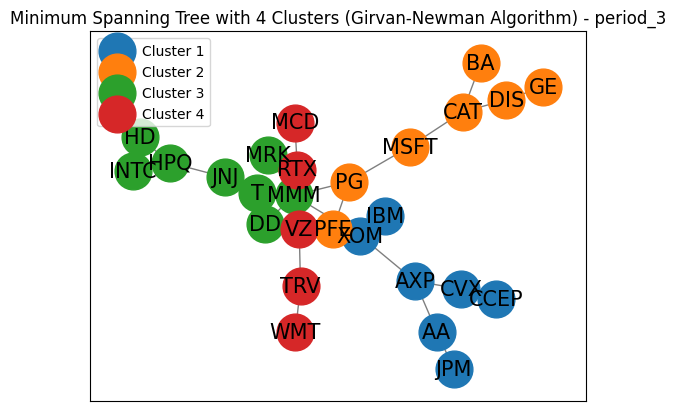

Metrics for period_3:
Cluster 1: Average Return = 0.0016, Standard Deviation = 0.0491, Sharpe Ratio = 0.0330
Cluster 2: Average Return = -0.0003, Standard Deviation = 0.0373, Sharpe Ratio = -0.0078
Cluster 3: Average Return = 0.0006, Standard Deviation = 0.0346, Sharpe Ratio = 0.0179
Cluster 4: Average Return = 0.0013, Standard Deviation = 0.0293, Sharpe Ratio = 0.0435
Evaluating Portfolios for period_3 in period_4:
Overall Portfolio Metrics: Average Return = 0.0023, Standard Deviation = 0.0243, Sharpe Ratio = 0.0998


In [57]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from networkx.algorithms.community import girvan_newman
from itertools import product
from copy import deepcopy

def generate_portfolios(communities, labels):
    """Generate all possible portfolios from the clusters without repeating tickers."""
    stock_combinations = [list(labels[node] for node in community) for community in communities]
    return list(product(*stock_combinations))

for period_num, period in enumerate(['period_1', 'period_2', 'period_3'], start=1):
    # Convert the correlation matrix to a distance matrix
    distance_matrix = np.sqrt(2 * (1 - correlation_matrices[period]))
    tickers = sorted(set([index[0] for index in distance_matrix]))
    labels = {i: ticker for i, ticker in enumerate(tickers)}
    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    # Use the Girvan-Newman algorithm to find communities
    communities_generator = girvan_newman(G)
    num_clusters = 4  # Desired number of clusters
    for communities in communities_generator:
        if len(communities) == num_clusters:
            break

    # Plot the graph with clusters colored
    pos = nx.spring_layout(G)
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=plt.cm.tab10(i), node_size=700, label=f'Cluster {i+1}')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
    plt.title(f"Minimum Spanning Tree with {num_clusters} Clusters (Girvan-Newman Algorithm) - {period}")
    plt.legend()
    plt.show()
# Print average returns, standard deviation, and Sharpe ratio for each cluster
    period_returns = period_dfs[period]
    print(f"Metrics for {period}:")
    for i, community in enumerate(communities):
        cluster_tickers = [labels[node] for node in community]
        cluster_returns = period_returns[cluster_tickers].mean(axis=1)
        average_return = cluster_returns.mean()
        std_dev = cluster_returns.std()
        sharpe_ratio = average_return / std_dev if std_dev != 0 else np.nan
        print(f"Cluster {i+1}: Average Return = {average_return:.4f}, Standard Deviation = {std_dev:.4f}, Sharpe Ratio = {sharpe_ratio:.4f}")
    

   # Generate all possible portfolios from the clusters without repeating tickers
    portfolios = generate_portfolios(communities, labels)

   # Evaluate each portfolio in the following period
    if period_num < 4:  # Check if there is a following period
        following_period = f'period_{period_num + 1}'
        print(f"Evaluating Portfolios for {period} in {following_period}:")

        # Initialize lists to store portfolio metrics
        portfolio_returns = []
        portfolio_std_devs = []
        portfolio_sharpe_ratios = []

        for portfolio in portfolios:
            following_period_returns = period_dfs[following_period][list(portfolio)].mean(axis=1)
            average_return = following_period_returns.mean()
            std_dev = following_period_returns.std()
            sharpe_ratio = average_return / std_dev if std_dev != 0 else np.nan

            # Store the metrics for each portfolio
            portfolio_returns.append(average_return)
            portfolio_std_devs.append(std_dev)
            portfolio_sharpe_ratios.append(sharpe_ratio)

        # Calculate and report the overall statistics for all portfolios
        overall_average_return = np.mean(portfolio_returns)
        overall_std_dev = np.mean(portfolio_std_devs)
        overall_sharpe_ratio = np.mean(portfolio_sharpe_ratios)
        print(f"Overall Portfolio Metrics: Average Return = {overall_average_return:.4f}, Standard Deviation = {overall_std_dev:.4f}, Sharpe Ratio = {overall_sharpe_ratio:.4f}")

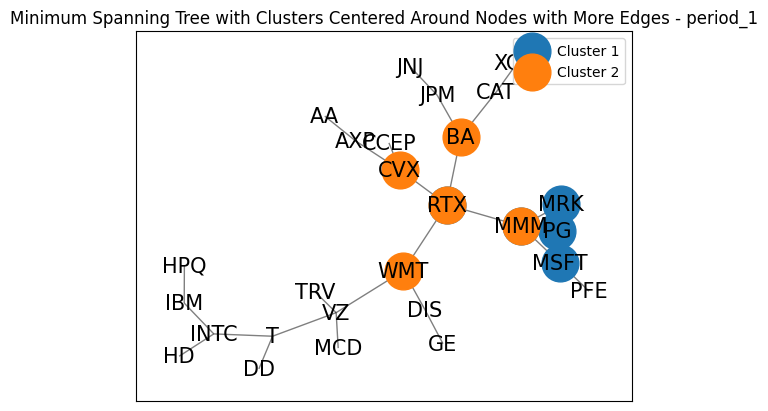

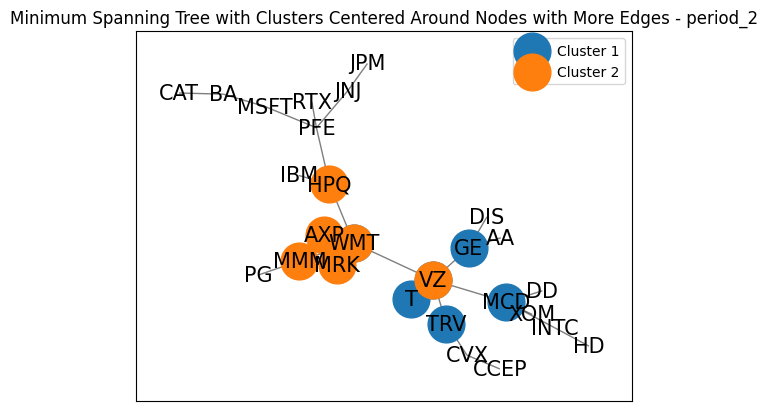

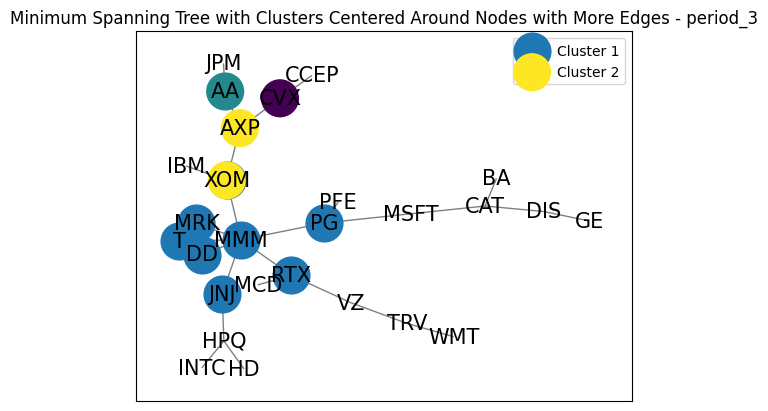

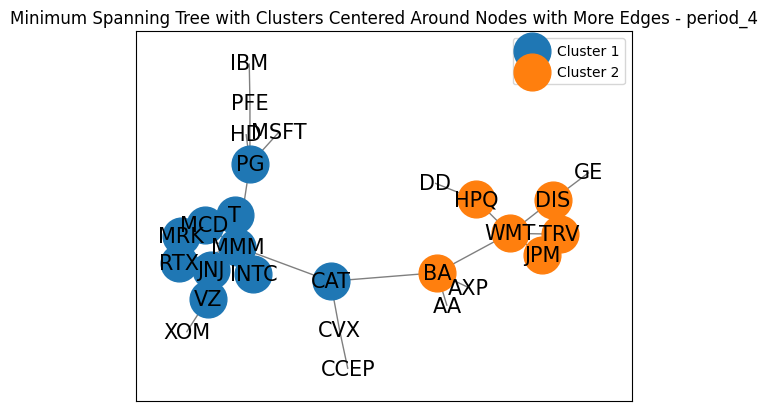

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree


for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    # Convert the correlation matrix to a distance matrix
    distance_matrix = np.sqrt(2 * (1 - correlation_matrices[period]))
    tickers = sorted(set([index[0] for index in distance_matrix]))
    labels = {i: ticker for i, ticker in enumerate(tickers)}

    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    # Find the nodes with the highest degree
    central_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:2]

    # Create clusters centered around the central nodes
    clusters = []
    for central_node in central_nodes:
        cluster = [central_node[0]] + list(G.neighbors(central_node[0]))
        clusters.append(cluster)

    # Plot the graph with clusters colored
    pos = nx.spring_layout(G)
    for i, cluster in enumerate(clusters):
        nx.draw_networkx_nodes(G, pos, nodelist=cluster, node_color=plt.cm.tab10(i), node_size=700, label=f'Cluster {i+1}')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
    plt.title(f"Minimum Spanning Tree with Clusters Centered Around Nodes with More Edges - {period}")
    plt.legend()
    plt.show()
